In [30]:
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np

import datetime
import matplotlib.dates as mdates

sns.set_style('whitegrid')

plt.rcParams['figure.figsize'] = [15, 10]

# Executive Summary

Happy Cow, founded by an American couple in 2013, is a Hong Kong-based manufacturer and distributor of dairy-free frozen dessert. Initially attracting customers in the vegan community, its mission is to produce the finest quality plant-based frozen dessert in Asia with a commitment to creating a healthier alternative for people and the planet. In 2015, Mary Schroeder bought the company and took over as owner and CEO of Happy Cow.


Looking at the raw store sales for *University Staff* data, our key business questions are:
- Which months had the most/least revenue?
- Which day of the week had the most/least revenue?
- Which flavors had the most/least revenue during a certain period?
- What serving size (single, double, or triple scoop) do staff prefer? 

\*Disclaimer: The University Calendar is dated Sep 2017 to Aug 2018. We extrapolated this data to include Apr 2017 to Aug 2017 to draw insights on the *University Staff* data.


# Objective of Exploratory Data Analysis

Mary Schroeder’s main objective is to come up with business actions backed by data to further expand the company’s operations and increase its market share among local Chinese people. Mary opened Happy Cow’s first retail store on the University of Hong Kong campus in March 2017, and asked Susan Chen, a young intern, to analyze the existing data and suggest new promotional initiatives.


# Basic Exploration and Pre-Processing

## Loading the Data

In [31]:
# Read the Excel file
df = pd.read_excel('HK1227-XLS-ENG.xlsx', sheet_name='staff daily')
df.head()

,Product,S. Caramel Staff,Mango Staff,Chocolate Staff,Pure Coconut Staff,Mint Choco Staff,Strawberry Staff,Waffle Cone Staff,Chai Tea Staff,Hezelnut Staff,...,Lime Coconut Staff,Pistachio Staff,Ginger Staff,1 Topping Staff,Cus IC Sand Staff,3 Topping Staff,Single Scoop Staff,Tub Staff,Triple Scoop Staff,Double Scoop Staff
0,Sat 1st Apr 2017,0.0,30.0,30.0,60.0,30.0,0.0,12.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,Sun 2nd Apr 2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,Mon 3rd Apr 2017,0.0,60.0,60.0,30.0,0.0,0.0,6.0,0.0,60.0,...,0,0,0,0,0,0,0,0,0,-15
3,Tue 4th Apr 2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,Wed 5th Apr 2017,60.0,90.0,60.0,60.0,120.0,0.0,24.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,-45


## Identifying the Variables
Predictors (independent variable)
- Flavor (categorical)
- Scoops (categorical)
- Date of sale (continuous)

Targets (dependent variable)
- Revenue (continuous)

## Cleaning the Data

In [32]:
# Clean the data
df_daily = df.copy()
df_daily.columns = df.columns.str.replace(' Staff', '')
df_daily.set_index('Product', inplace=True)

# Convert dataset to a time series
df_daily.index = df_daily.index.str.replace('st', '').str.replace('nd', '').str.replace('rd', '').str.replace('th', '')
df_daily.index = pd.to_datetime(df_daily.index, format='%a %d %b %Y')

df_daily.index.rename('date', inplace=True)
df_daily

,S. Caramel,Mango,Chocolate,Pure Coconut,Mint Choco,Strawberry,Waffle Cone,Chai Tea,Hezelnut,Green Tea,...,Lime Coconut,Pistachio,Ginger,1 Topping,Cus IC Sand,3 Topping,Single Scoop,Tub,Triple Scoop,Double Scoop
date,,,,,,,,,,,,,,,,,,,,,
2017-04-01,0.0,30.0,30.0,60.0,30.0,0.0,12.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2017-04-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2017-04-03,0.0,60.0,60.0,30.0,0.0,0.0,6.0,0.0,60.0,0.0,...,0,0,0,0,0,0,0,0,0,-15
2017-04-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2017-04-05,60.0,90.0,60.0,60.0,120.0,0.0,24.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,-45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-26,60.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,...,30,0,0,0,0,0,0,0,0,0
2017-09-27,60.0,0.0,0.0,0.0,0.0,0.0,18.0,30.0,90.0,0.0,...,0,0,0,0,0,0,0,0,0,-15
2017-09-28,30.0,0.0,270.0,0.0,30.0,30.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# This is our working dataframe
df_flavor = df_daily.iloc[:, :-7].drop(columns=['Waffle Cone', 'Ice Cream Sand'])
main_df = df_flavor.stack().reset_index().set_index('date')
main_df.columns = ['flavor', 'revenue']
main_df.index.rename('date', inplace=True)
main_df

,flavor,revenue
date,,
2017-04-01,S. Caramel,0.0
2017-04-01,Mango,30.0
2017-04-01,Chocolate,30.0
2017-04-01,Pure Coconut,60.0
2017-04-01,Mint Choco,30.0
...,...,...
2017-09-30,Apricot,0.0
2017-09-30,Red Bean,0.0
2017-09-30,Lime Coconut,0.0


### Creating New Feature: Day Name (categorical)

In [34]:
# We create a new feature 'day_name' for our analyses in the next section.
new_main_df = main_df.reset_index()
new_main_df['day_name'] = new_main_df['date'].dt.day_name()
new_main_df.set_index('date', inplace=True)
new_main_df

,flavor,revenue,day_name
date,,,
2017-04-01,S. Caramel,0.0,Saturday
2017-04-01,Mango,30.0,Saturday
2017-04-01,Chocolate,30.0,Saturday
2017-04-01,Pure Coconut,60.0,Saturday
2017-04-01,Mint Choco,30.0,Saturday
...,...,...,...
2017-09-30,Apricot,0.0,Saturday
2017-09-30,Red Bean,0.0,Saturday
2017-09-30,Lime Coconut,0.0,Saturday


### Checking for Missing Data

In [35]:
# There are no missing values in the dataset
new_main_df.isna().sum()

flavor      0
revenue     0
day_name    0
dtype: int64

There is no missing data.

# Exploration Phase and Storytelling

## Identifying Outliers and Trends

### Generating the Weekly Revenue for all Flavors

In [36]:
weekly_revenue = new_main_df.resample('W-Fri').sum().squeeze()
weekly_revenue += df_daily.drop(columns=df_flavor.columns).sum(axis=1).resample('W-Fri').sum().squeeze()
weekly_revenue

date
2017-04-07    1767.00000
2017-04-14    1212.00000
2017-04-21    1811.00000
2017-04-28    1676.00000
2017-05-05    1558.00000
2017-05-12    2189.00000
2017-05-19    2837.99998
2017-05-26    3222.00000
2017-06-02    4324.00000
2017-06-09    5716.99998
2017-06-16    5873.00000
2017-06-23    4293.00000
2017-06-30    8319.99992
2017-07-07    3374.00000
2017-07-14    3081.00000
2017-07-21    2214.00000
2017-07-28    2136.00000
2017-08-04    2402.00000
2017-08-11    1947.00000
2017-08-18    2564.00000
2017-08-25    2013.00000
2017-09-01    1873.00000
2017-09-08    1705.00000
2017-09-15    1782.00000
2017-09-22    2268.00000
2017-09-29    1607.00000
2017-10-06      51.00000
Freq: W-FRI, Name: revenue, dtype: float64

#### Figure. Weekly Revenue

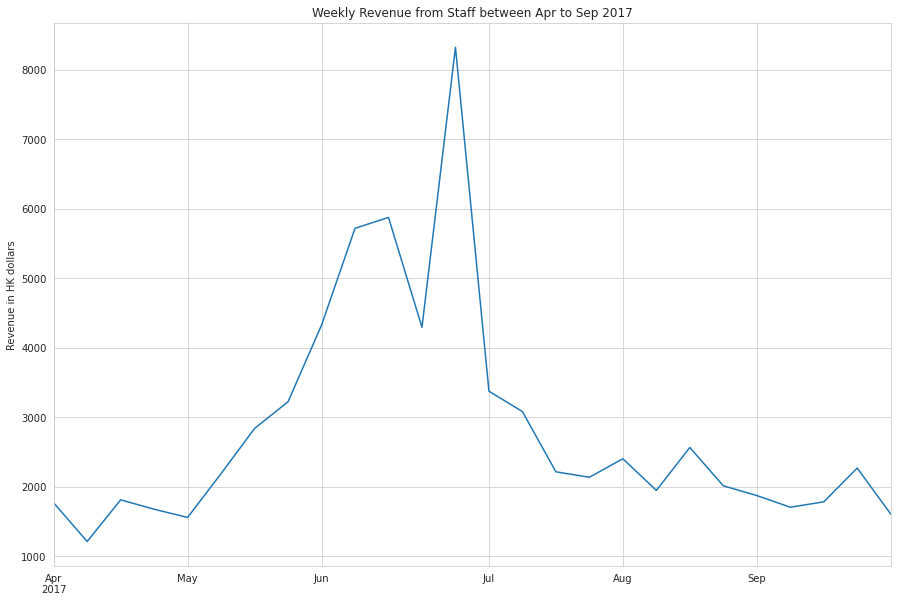

In [37]:
# Plot the weekly revenue over all flavors
weekly_revenue_ax = weekly_revenue.iloc[:-1].plot(kind='line')
weekly_revenue_ax.set_title('Weekly Revenue from Staff between Apr to Sep 2017')
weekly_revenue_ax.set_xlabel('')
weekly_revenue_ax.set_ylabel('Revenue in HK dollars')
plt.show()

**Insights.**

The weekly time series chart for staff depicts notable spikes on certain weeks in June. This time period is the summer season in Hongkong, which naturally increases the demand for cold snacks. The cause of these spikes can be inferred from the university calendar. In particular, the summer break starts on the first week of June, and the optional summer semester starts on the last week of June. We can look further into these spikes by analyzing the daily time series chart.

### Generating the Daily Revenue for all Flavors

In [39]:
daily_revenue = new_main_df.resample('D').sum().squeeze()

# Get the net revenue taking into account discounts from mode of serving
daily_revenue += df_daily.drop(columns=df_flavor.columns).sum(axis=1)
daily_revenue

date
2017-04-01    260.0
2017-04-02      0.0
2017-04-03    295.0
2017-04-04      0.0
2017-04-05    403.0
              ...  
2017-09-26    156.0
2017-09-27    213.0
2017-09-28    420.0
2017-09-29    234.0
2017-09-30     51.0
Freq: D, Name: revenue, Length: 183, dtype: float64

#### Stastistics for Daily Revenue

In [40]:
# Daily Revenue statistics before handling outliers.
daily_revenue.describe()

count     183.000000
mean      403.371584
std       359.806835
min         0.000000
25%       183.500000
50%       339.000000
75%       517.500000
max      2302.999900
Name: revenue, dtype: float64

#### Figure. Daily Revenue

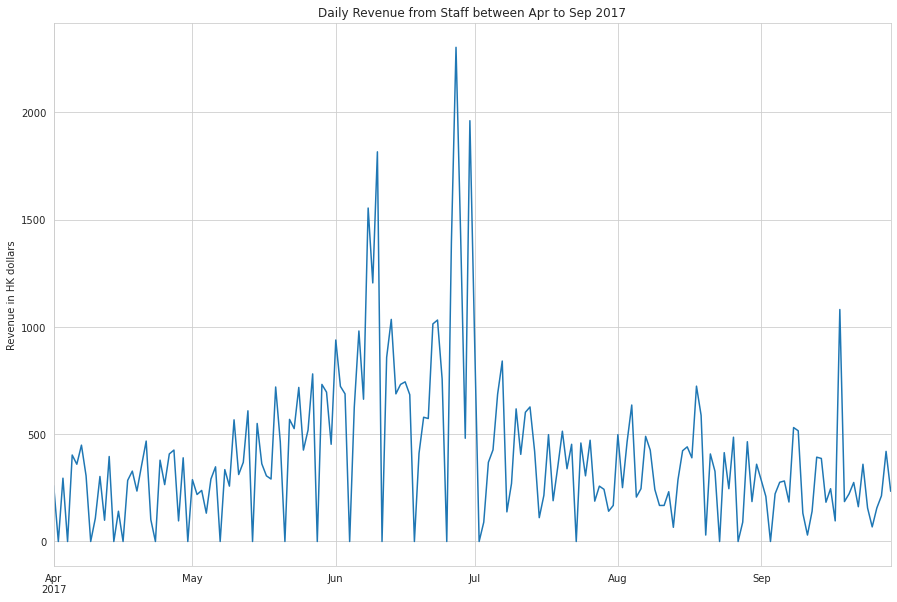

In [41]:
# Plot of the weekly revenue over all flavors
daily_revenue_ax = daily_revenue.iloc[:-1].plot(kind='line')
daily_revenue_ax.set_title('Daily Revenue from Staff between Apr to Sep 2017')
daily_revenue_ax.set_xlabel('')
daily_revenue_ax.set_ylabel('Revenue in HK dollars')
plt.show()

**Insights.**

The daily time series chart for staff corroborates the trend observed in the weekly time series. Moreover, it also showed another spike in revenue specifically on September 18, 2017, which can be related to the shift in season from summer to autumn. Prior to July 2017, no revenue was generated on Sundays. There was no further information in the case study to explain why Sundays started to generate revenue from July 2017 onwards.

### Outlier Treatment

We remove the outliers by considering only the data within the 5th percentile to 95th percentile.
We will treat the outliers separately.

In [42]:
# Use capping method to detect outliers
np.percentile(daily_revenue, 5), np.percentile(daily_revenue, 95)

(0.0, 1030.2)

In [43]:
# Remove the outliers
outliers = daily_revenue[(daily_revenue > np.percentile(daily_revenue, 95)) | 
                         (daily_revenue < np.percentile(daily_revenue, 5))]
outliers

date
2017-06-08    1554.00000
2017-06-09    1205.00000
2017-06-10    1816.00000
2017-06-13    1035.00000
2017-06-23    1032.00000
2017-06-26    1392.00000
2017-06-27    2302.99990
2017-06-28    1426.00002
2017-06-30    1961.00000
2017-09-18    1081.00000
Name: revenue, dtype: float64

### Generating the Daily Revenue without Outliers

In [44]:
daily_revenue_filtered = daily_revenue[(daily_revenue < 
                                        np.percentile(daily_revenue, 95)) & 
                                       (daily_revenue > np.percentile(daily_revenue, 5))]
daily_revenue_filtered

date
2017-04-01    260.0
2017-04-03    295.0
2017-04-05    403.0
2017-04-06    360.0
2017-04-07    449.0
              ...  
2017-09-26    156.0
2017-09-27    213.0
2017-09-28    420.0
2017-09-29    234.0
2017-09-30     51.0
Name: revenue, Length: 153, dtype: float64

#### Statistics for Daily Revenue without Outliers

In [45]:
# Daily Revenue statistics after handling outliers.
daily_revenue_filtered.describe()

count     153.000000
mean      385.699346
std       214.393394
min        30.000000
25%       232.000000
50%       360.000000
75%       498.000000
max      1014.000000
Name: revenue, dtype: float64

#### Figure. Daily Revenue without Outliers

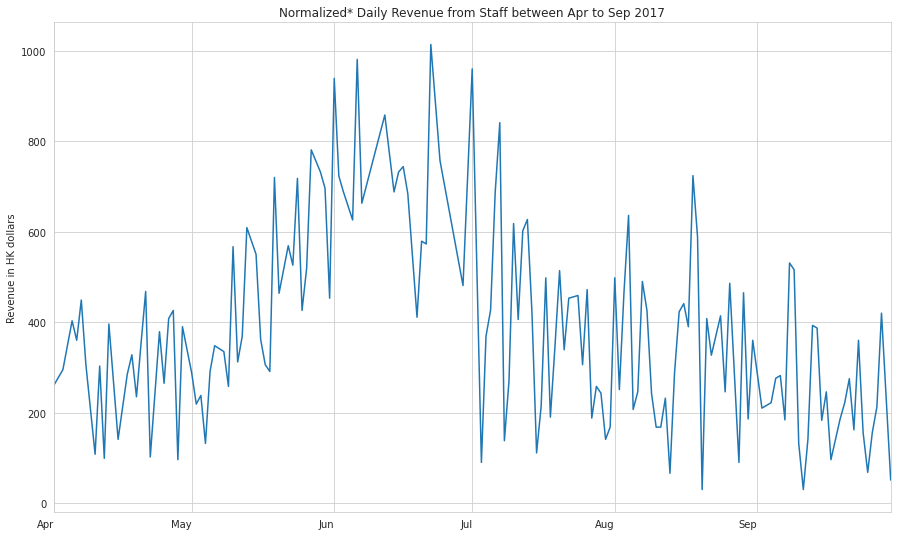

In [46]:
daily_revenue_filtered_ax = daily_revenue_filtered.plot(kind='line')

daily_revenue_filtered_ax.set_title('Normalized* Daily Revenue from Staff between Apr to Sep 2017')
daily_revenue_filtered_ax.set_xlabel('')
daily_revenue_filtered_ax.set_ylabel('Revenue in HK dollars')

daily_revenue_filtered_ax.set_xlim([datetime.date(2017, 4, 1), datetime.date(2017, 9, 30)])
myFmt = mdates.DateFormatter('%b')
daily_revenue_filtered_ax.xaxis.set_major_formatter(myFmt)

plt.xticks(rotation=0)
plt.show()

**Insights.**

Despite of the absence of the outliers, the resulting chart still corroborates the trend observed from the weekly time series. This time period is the summer season in Hongkong, which naturally increases the demand for cold snacks.

\**Normalized* implies the outliers have been removed.

### Generating the Weekly Average Revenue without Outliers

In [47]:
weekly_revenue_filtered = daily_revenue_filtered.resample('W-Fri').mean().squeeze()
weekly_revenue_filtered

date
2017-04-07    353.400000
2017-04-14    242.400000
2017-04-21    301.833333
2017-04-28    279.333333
2017-05-05    259.666667
2017-05-12    364.833333
2017-05-19    472.999997
2017-05-26    537.000000
2017-06-02    720.666667
2017-06-09    739.499995
2017-06-16    755.500000
2017-06-23    652.200000
2017-06-30    619.000000
2017-07-07    562.333333
2017-07-14    440.142857
2017-07-21    316.285714
2017-07-28    356.000000
2017-08-04    343.142857
2017-08-11    278.142857
2017-08-18    366.285714
2017-08-25    335.500000
2017-09-01    312.166667
2017-09-08    284.166667
2017-09-15    254.571429
2017-09-22    197.833333
2017-09-29    229.571429
2017-10-06     51.000000
Freq: W-FRI, Name: revenue, dtype: float64

#### Figure. Daily Revenue and Weekly Average Revenue (without outliers)

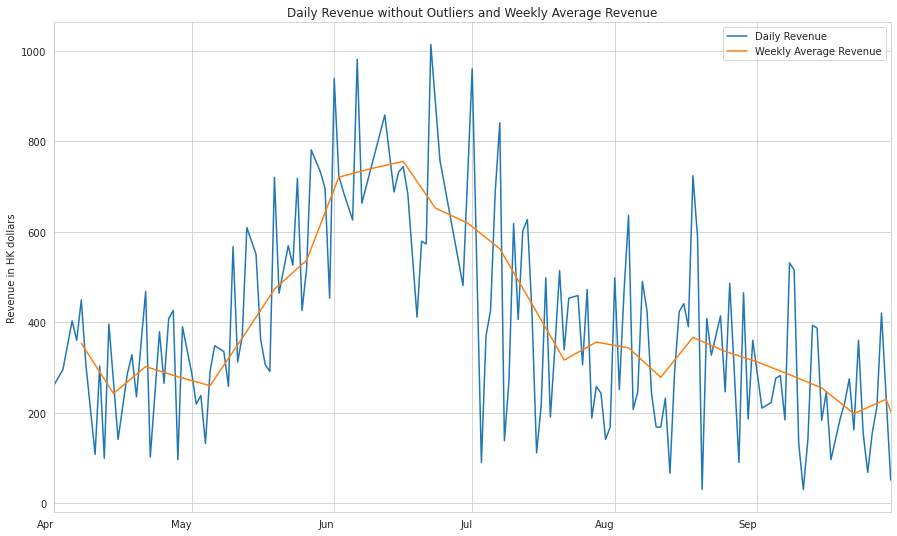

In [48]:
daily_revenue_filtered.plot(kind='line')
weekly_revenue_filtered.plot(kind='line')
plt.title('Daily Revenue without Outliers and Weekly Average Revenue')
plt.xlabel('')
plt.ylabel('Revenue in HK dollars')
plt.legend(['Daily Revenue', 'Weekly Average Revenue'])

plt.xlim([datetime.date(2017, 4, 1), datetime.date(2017, 9, 30)])
myFmt = mdates.DateFormatter('%b')
plt.gca().xaxis.set_major_formatter(myFmt)
plt.xticks(rotation=0)

plt.show()

**Insights.**

Regardless of the outliers, there is a peak season during summer where they can retain their marketing campaigns. Mary and her marketing team can also check other months with low sales as they can also invest in marketing campaigns to improve their performance on these non-performing months.

## Identifying Top Flavors per Season

We want these plots to understand the optimal time the best season to sell a certain flavor.

**Limitation:**
We cannot directly compare seasonal revenue because some seasons are underrepresented in the data.

### Creating New Feature: Season (categorical)

In [49]:
# Filter out the outliers.
flavor_revenue = new_main_df[~new_main_df.index.isin(outliers.index)]
flavor_revenue

,flavor,revenue,day_name
date,,,
2017-04-01,S. Caramel,0.0,Saturday
2017-04-01,Mango,30.0,Saturday
2017-04-01,Chocolate,30.0,Saturday
2017-04-01,Pure Coconut,60.0,Saturday
2017-04-01,Mint Choco,30.0,Saturday
...,...,...,...
2017-09-30,Apricot,0.0,Saturday
2017-09-30,Red Bean,0.0,Saturday
2017-09-30,Lime Coconut,0.0,Saturday


In [50]:
# New feature season of sale
flavor_revenue.loc[:'2017-05-15', 'season'] = 'spring'
flavor_revenue.loc['2017-05-16':'2017-09-15', 'season'] = 'summer'
flavor_revenue.loc['2017-09-16':, 'season'] = 'autumn'
flavor_revenue

/tmp/ipykernel_5669/81050055.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flavor_revenue.loc[:'2017-05-15', 'season'] = 'spring'


,flavor,revenue,day_name,season
date,,,,
2017-04-01,S. Caramel,0.0,Saturday,spring
2017-04-01,Mango,30.0,Saturday,spring
2017-04-01,Chocolate,30.0,Saturday,spring
2017-04-01,Pure Coconut,60.0,Saturday,spring
2017-04-01,Mint Choco,30.0,Saturday,spring
...,...,...,...,...
2017-09-30,Apricot,0.0,Saturday,autumn
2017-09-30,Red Bean,0.0,Saturday,autumn
2017-09-30,Lime Coconut,0.0,Saturday,autumn


### Generating Seasonal Revenue per Flavor

We separate each season as its own `DataFrame`.

In [51]:
# Set up the seasonal dataframes for plotting
summer_revenue = (flavor_revenue.groupby(['season', 'flavor'])
                  .agg('sum').sort_values('revenue', ascending=False).reset_index())
summer_revenue = summer_revenue[summer_revenue['season'] == 'summer']

spring_revenue = (flavor_revenue.groupby(['season', 'flavor'])
                  .agg('sum').sort_values('revenue', ascending=False).reset_index())
spring_revenue = spring_revenue[spring_revenue['season'] == 'spring']

autumn_revenue = (flavor_revenue.groupby(['season', 'flavor'])
                  .agg('sum').sort_values('revenue', ascending=False).reset_index())
autumn_revenue = autumn_revenue[autumn_revenue['season'] == 'autumn']

#### Figure. Revenue per Flavor in Spring

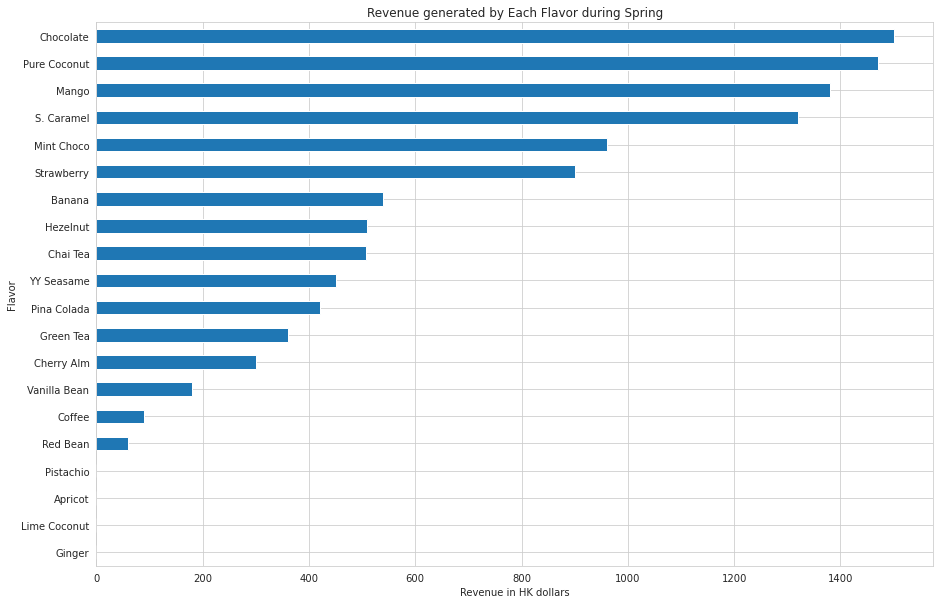

In [52]:
# Plot spring

spring_ax = spring_revenue.drop(columns='season').sort_values('revenue').plot(x='flavor', y='revenue', 
                                                                              kind='barh', legend=None)
spring_ax.set_title('Revenue generated by Each Flavor during Spring')
spring_ax.set_xlabel('Revenue in HK dollars')
spring_ax.set_ylabel('Flavor')
plt.show()

**Insights.**

For the next store, we recommend displaying the followings flavors during spring:
1. Chocolate
2. Pure Coconut
3. Mango
4. Salted Caramel
5. Mint Choco
6. Strawberry
7. Banana
8. Hezelnut

We recommend to lower the inventory for the following worst performing flavors during spring:
1. Pistachio
2. Apricot
3. Lime Coconut
4. Ginger

#### Figure. Revenue per Flavor in Summer

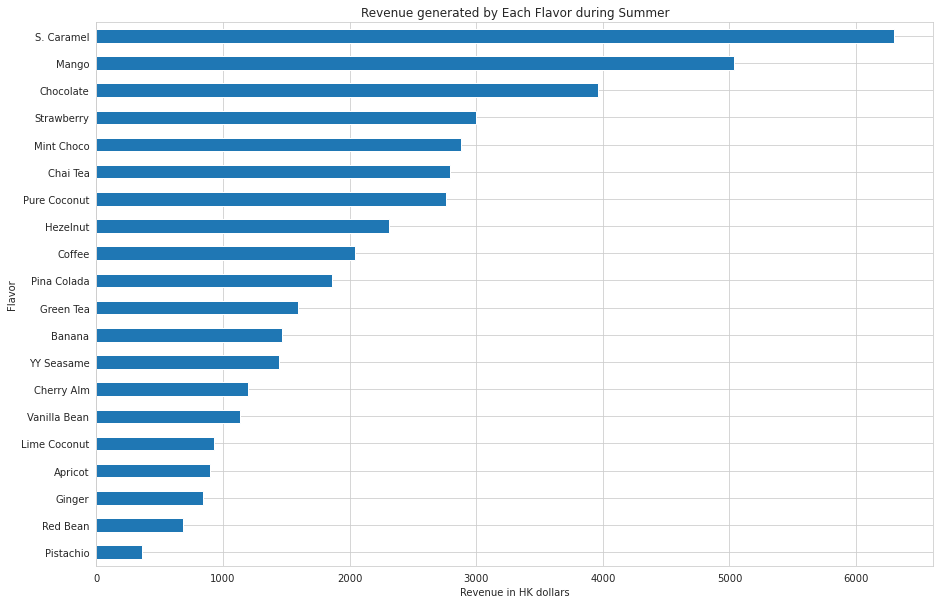

In [53]:
# Plot summer

summer_ax = summer_revenue.drop(columns='season').sort_values('revenue').plot(x='flavor', y='revenue', 
                                                                              kind='barh', legend=None)
summer_ax.set_title('Revenue generated by Each Flavor during Summer')
summer_ax.set_xlabel('Revenue in HK dollars')
summer_ax.set_ylabel('Flavor')
plt.show()

**Insights.**

For the next store, we recommend displaying the followings flavors during summer:
1. Salted Caramel
2. Mango
3. Chocolate
4. Mint Choco
5. Strawberry
6. Chai Tea
7. Pure Coconut
8. Hezelnut

We recommend to lower the inventory for the following worst performing flavors during summer:
1. Pistachio
2. Red Bean
3. Ginger
4. Apricot

#### Figure. Revenue per Flavor in Autumn

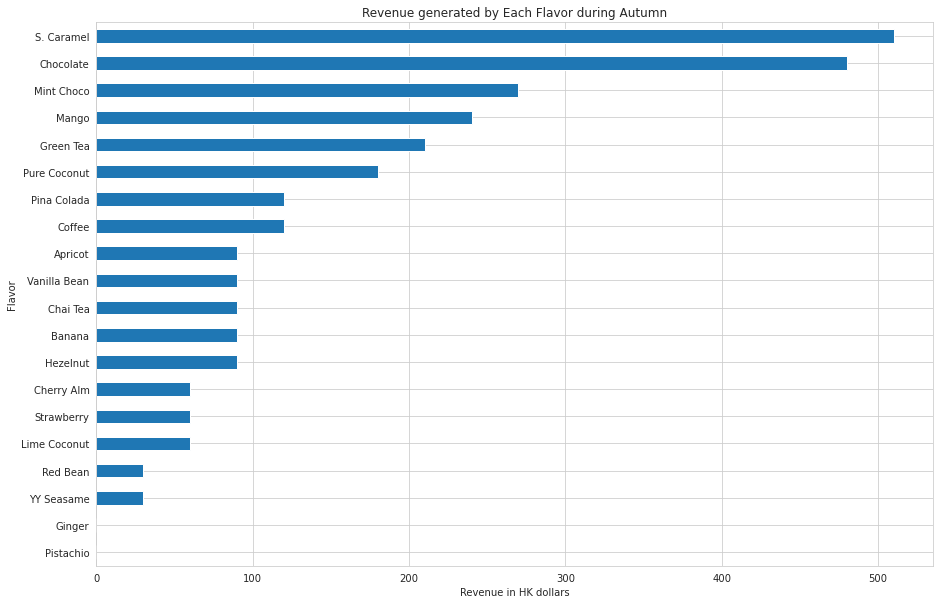

In [54]:
# Plot spring

autumn_ax = autumn_revenue.drop(columns='season').sort_values('revenue').plot(x='flavor', y='revenue', 
                                                                              kind='barh', legend=None)
autumn_ax.set_title('Revenue generated by Each Flavor during Autumn')
autumn_ax.set_xlabel('Revenue in HK dollars')
autumn_ax.set_ylabel('Flavor')
plt.show()

**Insights.**

For the next store, we recommend displaying the followings flavors during autumn:
1. Salted Caramel
2. Chocolate
3. Mint Choco
4. Mango
5. Green Tea
6. Pure Coconut
7. Pina Colada
8. Coffee

We recommend to lower the inventory for the following worst performing flavors during autumn:
1. Pistachio
2. Ginger
3. YY Seasame
4. Red Bean

### Generating the Revenue per Flavor for Outliers

In [55]:
outlier_revenue = new_main_df[new_main_df.index.isin(outliers.index)]

outlier_revenue = (outlier_revenue.groupby('flavor')
                  .agg('sum').sort_values('revenue', ascending=False).reset_index())
outlier_revenue

,flavor,revenue
0,S. Caramel,2099.54545
1,Strawberry,1471.75757
2,Mint Choco,1432.87878
3,Mango,1373.42424
4,Pure Coconut,1319.09090
5,Chocolate,925.54545
6,Green Tea,898.25757
7,Vanilla Bean,868.25757
8,Chai Tea,599.09090
9,Red Bean,565.54545


#### Figure. Revenue per Flavor in Outliers

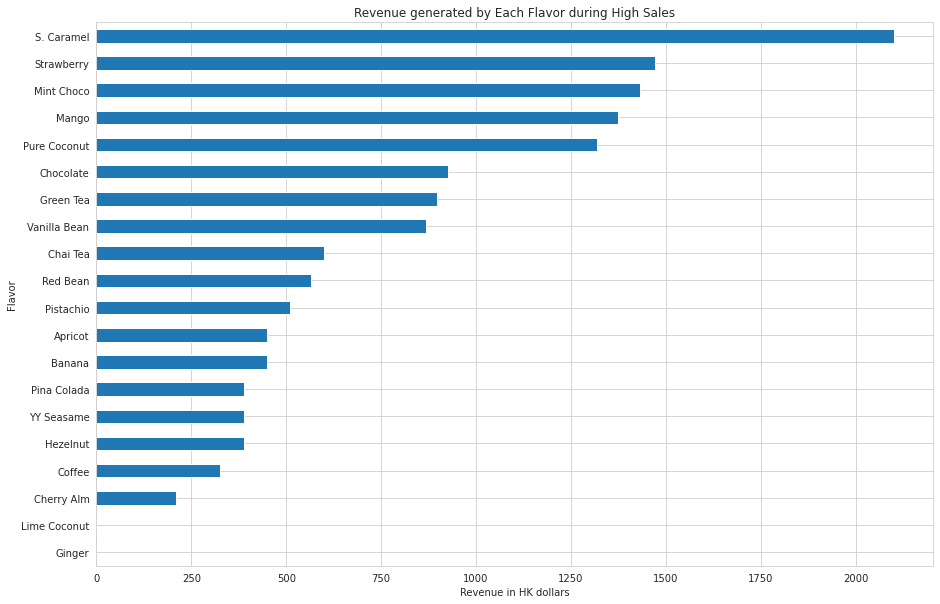

In [56]:
outlier_ax = outlier_revenue.sort_values('revenue').plot(x='flavor', y='revenue', 
                                                                              kind='barh', legend=None)
outlier_ax.set_title('Revenue generated by Each Flavor during High Sales')
outlier_ax.set_xlabel('Revenue in HK dollars')
outlier_ax.set_ylabel('Flavor')
plt.show()

**Insights.**

Even during outlier days, the following flavors remain consistently popular:
1. Salted Caramel
2. Mint Choco
3. Chocolate
4. Mango

Among the four flavors, only Mango is seasonal (as a fruit). We recommend to ensure availability of Mango flavor to capitalize on its consistent demand. 

---

Consider improving the following flavors to improve sales:
1. Pistachio
2. Ginger
3. Red Bean
4. Apricot

## Identifying Revenue per Day of the Week

### Generating the Average Revenue per Day of the Week

In [57]:
# Average revenue per day of the week
weekday_ave = new_main_df.reset_index().groupby(['date']).sum().reset_index()
weekday_ave['day_name'] = weekday_ave['date'].dt.day_name()
weekday_ave = weekday_ave.groupby('day_name').mean()
weekday_ave

,revenue
day_name,
Friday,515.384615
Monday,432.307692
Saturday,452.222222
Sunday,49.615385
Thursday,466.538462
Tuesday,436.538457
Wednesday,395.480770


#### Figure. Average Revenue per Day of the Week

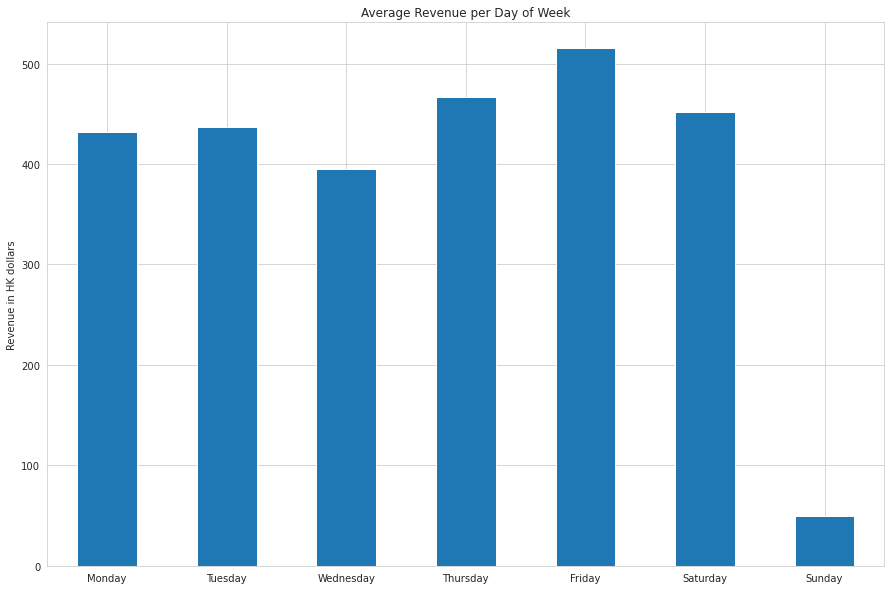

In [58]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_ave = weekday_ave.reindex(day_order)

weekday_ax = weekday_ave.plot(kind='bar', legend=None)

weekday_ax.set_title('Average Revenue per Day of Week')
weekday_ax.set_xlabel('')
weekday_ax.set_ylabel('Revenue in HK dollars')
plt.xticks(rotation=0)
plt.show()

**Insights.**

Revenue peaks during Fridays. This can be attributed to the tendency of staff to splurge after a long week of work. We recommend to ensure availability of top flavors close to Fridays.

Sales are lower during Wednesdays. Consider implementing more promotions during this day to alleviate low sales.

On average, there is little to no revenue during a Sunday because it is a non-working day for staff. Consider targetting different a customer demographic during Sundays.

## Identifying Serving Preference

#### Number of Sales by Serving Size

In [59]:
# The number of sales based on Scoop price
df_servings = df_daily.drop(columns=df_flavor.columns)
df_scoops = (df_servings[['Single Scoop', 'Double Scoop', 'Triple Scoop']]
             .join(new_main_df.resample('D').sum().squeeze()))
df_scoops['Double Scoop'] = (df_scoops['Double Scoop']/-15).astype(int)
df_scoops['Triple Scoop'] = (df_scoops['Triple Scoop']/-30).astype(int)
df_scoops['Single Scoop'] = np.round((df_scoops['revenue']
                                      - 15*df_scoops['Double Scoop'] 
                                      - 30*df_scoops['Triple Scoop'])/32).astype(int)
df_scoops.drop(columns='revenue').sum()

Single Scoop    2128
Double Scoop     262
Triple Scoop       6
dtype: int64

**Insights.**

The significant portion of the total revenue comes from Single Scoop sales. We recommend to optimize sales by scoops. In particular, focus on implementing better promotionals campaigns for double scoops and triple scoops.

**Limitation:** The count for Single Scoop is higher than the actual count as it was inferred from the remaining balance (after deduction of double and triple scoop revenue).

# Recommendation

**For laboratory**

- Continue to use HKU for flavor experimentation prior to distribution to other stores.
- Display a mix of the top performing flavors and one to two seasonal flavors for experimentation.

**For revenue boosting**
- Maintain an inventory of the top performing flavors for planned stores. 
- Lower the inventory of the worst performing flavor based on season.
- Reallocate freezer space based on the popularity of flavors. Prioritize the top performing flavors.
- Introduce marketing campaigns to boost sales during Wednesdays.
- Deploy promotional campaigns in anticipation of potential spikes in demand.

# References

We define seasons from this [page](https://www.travelchinaguide.com/climate/hongkong.htm).

<img src="https://static6.orstatic.com/userphoto2/photo/12/UOM/062731CE0A63CAA774A68Bpx.jpg"/>